# Proyecto Final 
## Predicción de Aprobación de Préstamos Bancarios

**Autor:** Juan Pablo Jiménez Martín, Fabian Rodriguez Herrera 
**Fecha:** Octubre 2025  
**Objetivo:** Desarrollar una red neuronal artificial para predecir la probabilidad de aprobación de préstamos bancarios en función de las características del solicitante, alcanzando una precisión superior al 80%.

---

## 1. ANÁLISIS Y EXPLORACIÓN DE DATOS

En esta primera fase del proyecto, realizaremos un análisis exhaustivo del conjunto de datos para comprender:
- La estructura y características de nuestros datos
- Distribuciones de variables
- Relaciones entre características
- Calidad de los datos (valores faltantes, outliers, etc.)

Este análisis es fundamental para tomar decisiones informadas durante el preprocesamiento y el diseño de la arquitectura de nuestra red neuronal.

### 1.1. Carga y Exploración Inicial del Dataset

En esta sección importaremos las librerías necesarias y cargaremos el dataset para realizar una primera exploración de su estructura.

#### 1.1.1. Importación de Librerías

Importaremos las librerías fundamentales para el análisis de datos:
- **pandas**: Manipulación y análisis de datos estructurados
- **numpy**: Operaciones numéricas y matrices
- **matplotlib y seaborn**: Visualización de datos
- **warnings**: Control de advertencias del sistema

In [135]:
# Importación de librerías para análisis de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para visualizaciones
plt.style.use('default')
sns.set_palette("husl")

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Suprimir advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')


#### 1.1.2. Carga del Dataset

Cargaremos el dataset de aprobación de préstamos desde el archivo CSV. Este conjunto de datos contiene información de solicitantes de préstamos bancarios y el resultado de su solicitud (aprobado/rechazado).

In [136]:
# Cargar el dataset
df = pd.read_csv('Dataset/loan_approval_dataset.csv')
print(f"\nDimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")


Dimensiones del dataset: 4269 filas y 13 columnas


In [137]:
# Nos percatamos de que nuestro dataset tenia espacios en blanco en los nombres de las columnas, por lo que procederemos a limpiarlos para evitar problemas en el análisis.
print("Limpieza de nombres de columnas\n")
print("="*70)

print("Nombres ANTES de limpiar:")
print(df.columns.tolist())

# Eliminar espacios al inicio y final de los nombres de columnas
df.columns = df.columns.str.strip()

print("\nNombres DESPUÉS de limpiar:")
print(df.columns.tolist())

Limpieza de nombres de columnas

Nombres ANTES de limpiar:
['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']

Nombres DESPUÉS de limpiar:
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


#### 1.1.3. Visualización de las Primeras Filas

Examinaremos las primeras filas del dataset para entender la estructura y el tipo de información que contiene cada columna.

In [138]:
# Visualizar las primeras 10 filas del dataset
print("Primeras 10 filas del dataset:\n")
display(df.head(10))

Primeras 10 filas del dataset:



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


#### 1.1.4. Información General del Dataset

Analizaremos los tipos de datos, la presencia de valores nulos y la memoria utilizada por el dataset.

In [139]:
# Información general del dataset
print("Información general del dataset:\n")
print(df.info())
print("\n" + "="*70 + "\n")

# Resumen de tipos de datos
print("Resumen de tipos de datos:")
print(f"- Variables numéricas: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"- Variables categóricas/objeto: {df.select_dtypes(include=['object']).shape[1]}")

Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+

#### 1.1.5. Análisis de Valores Únicos

Examinaremos los valores únicos de cada columna para identificar variables categóricas y detectar posibles inconsistencias en los datos.

In [140]:
# Análisis de valores únicos por columna
print("Valores únicos por columna:\n")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col:30s}: {unique_count:5d} valores únicos")
    
    # Mostrar valores únicos si son menos de 10 (variables categóricas)
    if unique_count < 10:
        print(f"Valores: {df[col].unique()}")

Valores únicos por columna:

loan_id                       :  4269 valores únicos
no_of_dependents              :     6 valores únicos
Valores: [2 0 3 5 4 1]
education                     :     2 valores únicos
Valores: [' Graduate' ' Not Graduate']
self_employed                 :     2 valores únicos
Valores: [' No' ' Yes']
income_annum                  :    98 valores únicos
loan_amount                   :   378 valores únicos
loan_term                     :    10 valores únicos
cibil_score                   :   601 valores únicos
residential_assets_value      :   278 valores únicos
commercial_assets_value       :   188 valores únicos
luxury_assets_value           :   379 valores únicos
bank_asset_value              :   146 valores únicos
loan_status                   :     2 valores únicos
Valores: [' Approved' ' Rejected']


### 1.2. Análisis Estadístico Descriptivo

Realizaremos un análisis estadístico completo de las variables numéricas y categóricas para comprender la distribución de los datos y detectar posibles anomalías.

#### 1.2.1. Estadísticas Descriptivas de Variables Numéricas

Calcularemos medidas de tendencia central (media, mediana) y dispersión (desviación estándar, rangos) para todas las variables numéricas.

In [141]:
# Seleccionar solo columnas numéricas (excluyendo loan_id)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'loan_id' in numerical_cols:
    numerical_cols.remove('loan_id')

# Estadísticas descriptivas
print("Estadísticas Descriptivas de Variables Numéricas:\n")
stats_df = df[numerical_cols].describe().T
stats_df['range'] = stats_df['max'] - stats_df['min']
stats_df['cv'] = (stats_df['std'] / stats_df['mean']) * 100  # Coeficiente de variación

display(stats_df)

Estadísticas Descriptivas de Variables Numéricas:



,count,mean,std,min,25%,50%,75%,max,range,cv
no_of_dependents,4269.00,2.50,1.70,0.00,1.00,3.00,4.00,5.00,5.00,67.87
income_annum,4269.00,5059123.92,2806839.83,200000.00,2700000.00,5100000.00,7500000.00,9900000.00,9700000.00,55.48
loan_amount,4269.00,15133450.46,9043362.98,300000.00,7700000.00,14500000.00,21500000.00,39500000.00,39200000.00,59.76
loan_term,4269.00,10.90,5.71,2.00,6.00,10.00,16.00,20.00,18.00,52.38
cibil_score,4269.00,599.94,172.43,300.00,453.00,600.00,748.00,900.00,600.00,28.74
residential_assets_value,4269.00,7472616.54,6503636.59,-100000.00,2200000.00,5600000.00,11300000.00,29100000.00,29200000.00,87.03
commercial_assets_value,4269.00,4973155.31,4388966.09,0.00,1300000.00,3700000.00,7600000.00,19400000.00,19400000.00,88.25
luxury_assets_value,4269.00,15126305.93,9103753.67,300000.00,7500000.00,14600000.00,21700000.00,39200000.00,38900000.00,60.18
bank_asset_value,4269.00,4976692.43,3250185.31,0.00,2300000.00,4600000.00,7100000.00,14700000.00,14700000.00,65.31


#### 1.2.2. Análisis de Variables Categóricas

Analizaremos la frecuencia y distribución de las variables categóricas para entender la composición de nuestros datos.

In [142]:
# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'loan_id' in categorical_cols:
    categorical_cols.remove('loan_id')

print("Análisis de Variables Categóricas:\n")
print("="*70)

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print("-" * 50)
    
    # Contar frecuencias
    freq = df[col].value_counts()
    freq_pct = df[col].value_counts(normalize=True) * 100
    
    # Crear DataFrame de resultados
    result = pd.DataFrame({
        'Frecuencia': freq,
        'Porcentaje': freq_pct
    })
    
    print(result)
    print()

Análisis de Variables Categóricas:


EDUCATION:
--------------------------------------------------
              Frecuencia  Porcentaje
education                           
Graduate            2144       50.22
Not Graduate        2125       49.78


SELF_EMPLOYED:
--------------------------------------------------
               Frecuencia  Porcentaje
self_employed                        
Yes                  2150       50.36
No                   2119       49.64


LOAN_STATUS:
--------------------------------------------------
             Frecuencia  Porcentaje
loan_status                        
Approved           2656       62.22
Rejected           1613       37.78



#### 1.2.3. Análisis de Valores Faltantes

Verificaremos la presencia de valores faltantes (NaN, None, espacios vacíos) que puedan afectar el entrenamiento del modelo.

In [143]:
# Análisis de valores faltantes
print("Análisis de Valores Faltantes:\n")

# Contar valores nulos
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

# Crear DataFrame de resultados
missing_df = pd.DataFrame({
    'Valores Faltantes': missing,
    'Porcentaje': missing_pct
})

# Filtrar solo columnas con valores faltantes
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No se encontraron valores faltantes en el dataset")

print(f"\nTotal de valores faltantes: {df.isnull().sum().sum()}")

Análisis de Valores Faltantes:

No se encontraron valores faltantes en el dataset

Total de valores faltantes: 0


### 1.3. Visualización de Distribuciones

Crearemos visualizaciones para entender la distribución de las variables y detectar patrones, outliers y asimetrías que puedan influir en el modelo.

#### 1.3.1. Distribución de Variables Numéricas (Histogramas)

Los histogramas nos permiten visualizar la forma de la distribución de cada variable numérica y detectar asimetrías o valores extremos.

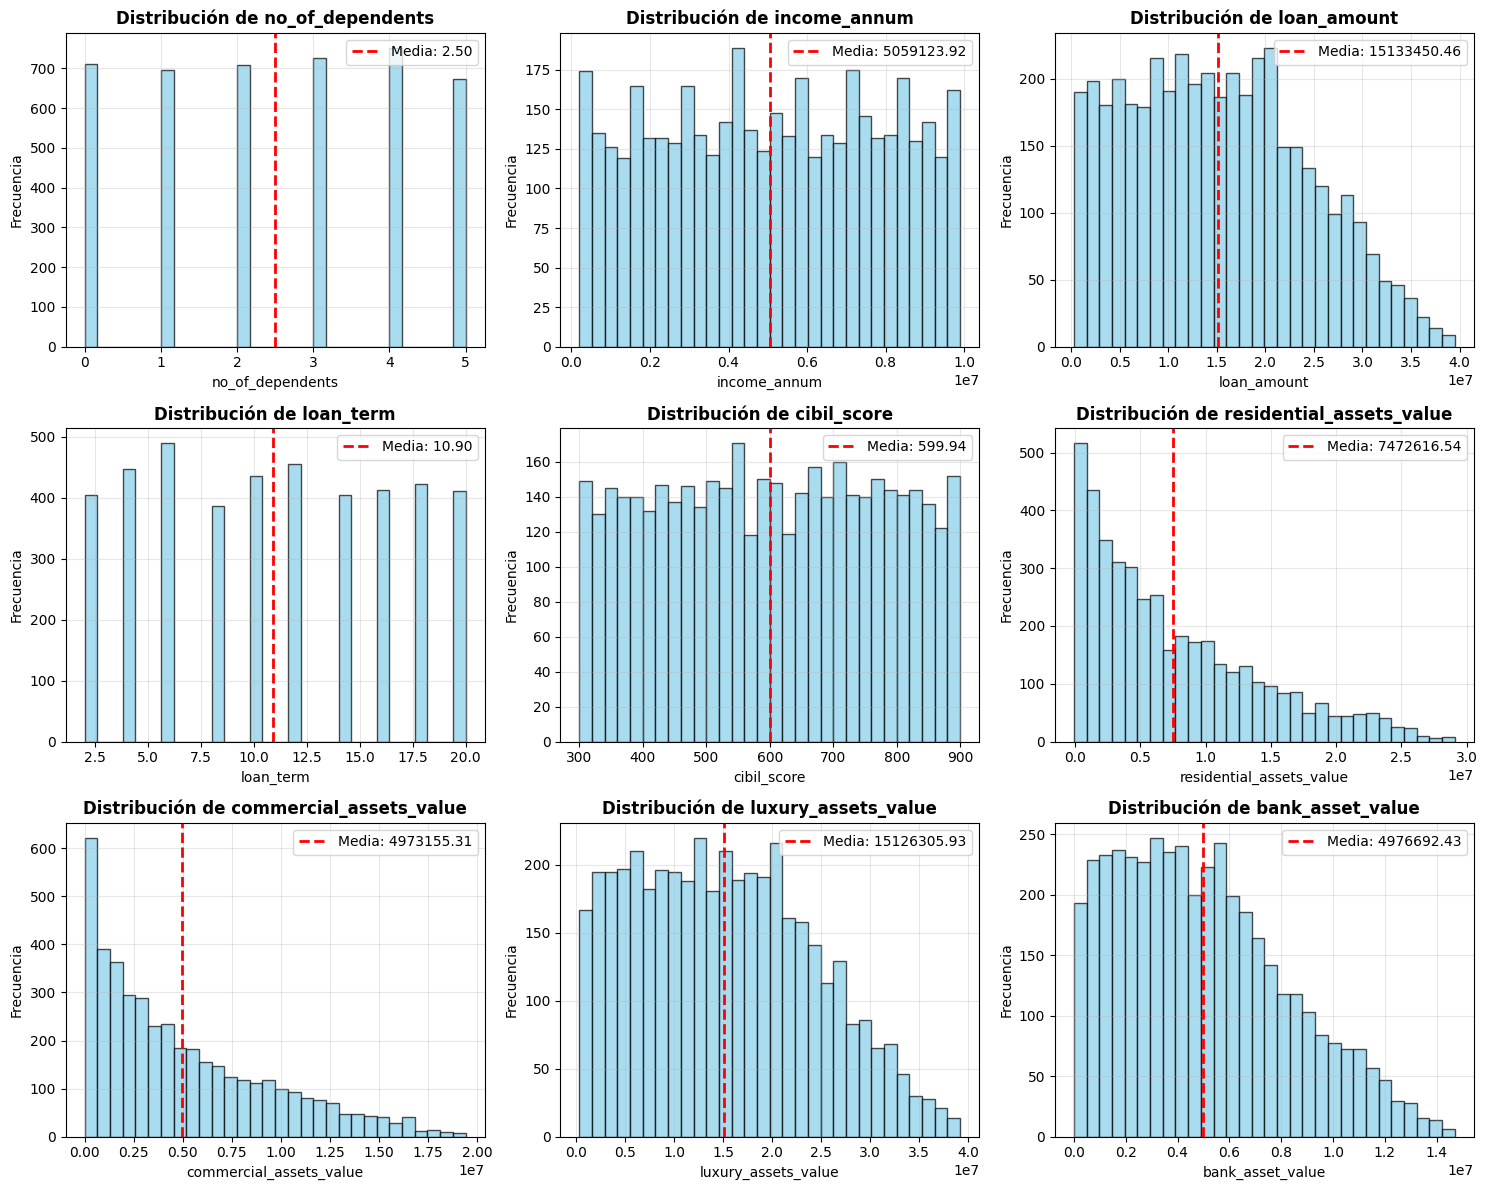

In [144]:
# Configuración de la visualización
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Crear histograma para cada variable numérica
for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)
    
    # Añadir línea de media
    mean_val = df[col].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    axes[idx].legend()

# Ocultar ejes no utilizados
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

#### 1.3.2. Boxplots para Detección de Outliers

Los diagramas de caja nos ayudan a identificar valores atípicos (outliers) que podrían afectar el entrenamiento de la red neuronal.

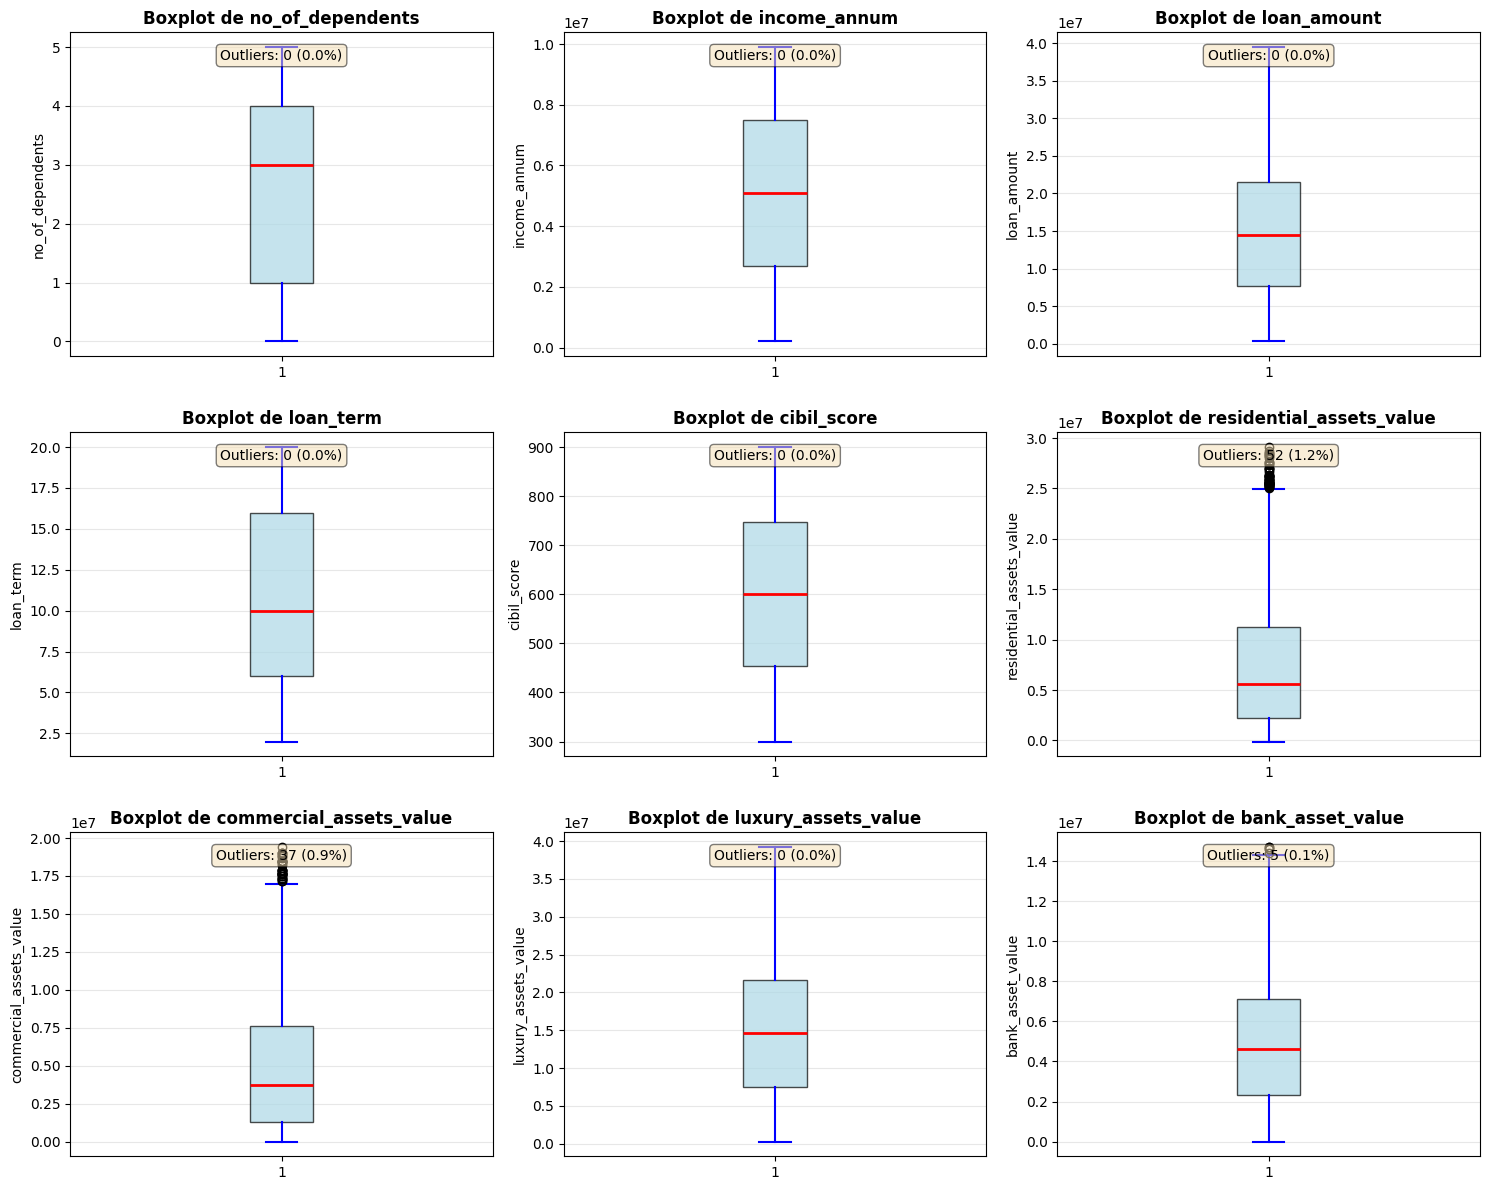

In [145]:
# Configuración de la visualización
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Crear boxplot para cada variable numérica
for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2),
                      whiskerprops=dict(color='blue', linewidth=1.5),
                      capprops=dict(color='blue', linewidth=1.5))
    
    axes[idx].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Calcular cantidad de outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
    
    axes[idx].text(0.5, 0.95, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)',
                   transform=axes[idx].transAxes, ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Ocultar ejes no utilizados
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

#### 1.3.3. Distribución de Variables Categóricas

Visualizaremos la distribución de las variables categóricas para entender la composición de los datos.

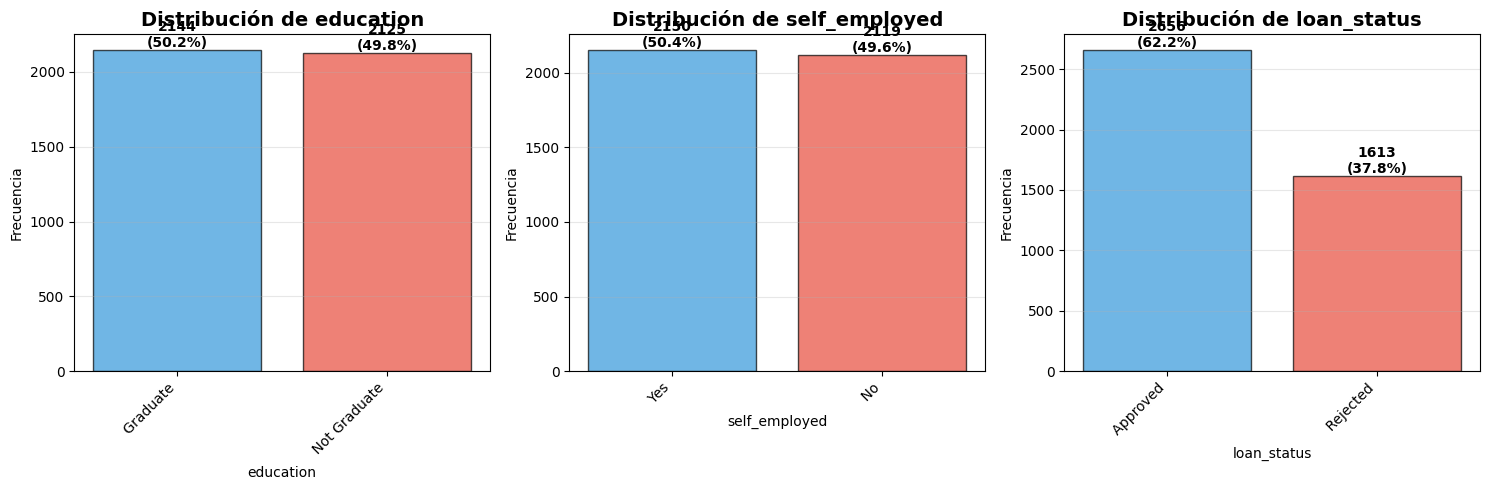

In [146]:
# Número de variables categóricas
n_cat = len(categorical_cols)

# Configuración de la visualización
fig, axes = plt.subplots(1, n_cat, figsize=(5 * n_cat, 5))
if n_cat == 1:
    axes = [axes]

# Crear gráfico de barras para cada variable categórica
for idx, col in enumerate(categorical_cols):
    # Contar frecuencias
    value_counts = df[col].value_counts()
    
    # Crear gráfico de barras
    bars = axes[idx].bar(range(len(value_counts)), value_counts.values, 
                          color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'][:len(value_counts)],
                          alpha=0.7, edgecolor='black')
    
    axes[idx].set_title(f'Distribución de {col}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Añadir valores en las barras
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{int(height)}\n({height/len(df)*100:.1f}%)',
                      ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 1.4. Análisis de la Variable Objetivo

Realizaremos un análisis profundo de la variable objetivo (loan_status) y su relación con las demás variables para entender qué características influyen en la aprobación de préstamos.

#### 1.4.1. Distribución de la Variable Objetivo

Analizaremos el balance entre las clases de nuestra variable objetivo (Approved vs Rejected).

In [178]:
# Análisis de la variable objetivo
print("ANÁLISIS DE LA VARIABLE OBJETIVO: loan_status")
print("="*70)

# Contar frecuencias
target_counts = df['loan_status'].value_counts()
target_pct = df['loan_status'].value_counts(normalize=True) * 100

print("\nDistribución de clases:")
for status, count in target_counts.items():
    pct = target_pct[status]
    print(f"  {status:12s}: {count:5d} ({pct:5.2f}%)")

# Calcular ratio de desbalance
approved = target_counts.get('Approved', 0)
rejected = target_counts.get('Rejected', 0)
ratio = max(approved, rejected) / min(approved, rejected) if min(approved, rejected) > 0 else 0

print(f"\nRatio de desbalance: {ratio:.2f}:1")

# Evaluar nivel de desbalance
if ratio <= 1.5:
    print("Las clases están balanceadas")
elif ratio <= 3.0:
    print("Desbalance moderado")
else:
    print("Desbalance severo.")

ANÁLISIS DE LA VARIABLE OBJETIVO: loan_status

Distribución de clases:
  Approved    :  2656 (62.22%)
  Rejected    :  1613 (37.78%)

Ratio de desbalance: 1.65:1
Desbalance moderado


#### 1.4.2. Visualización de la Variable Objetivo

Crearemos visualizaciones para representar la distribución de la variable objetivo de forma clara.

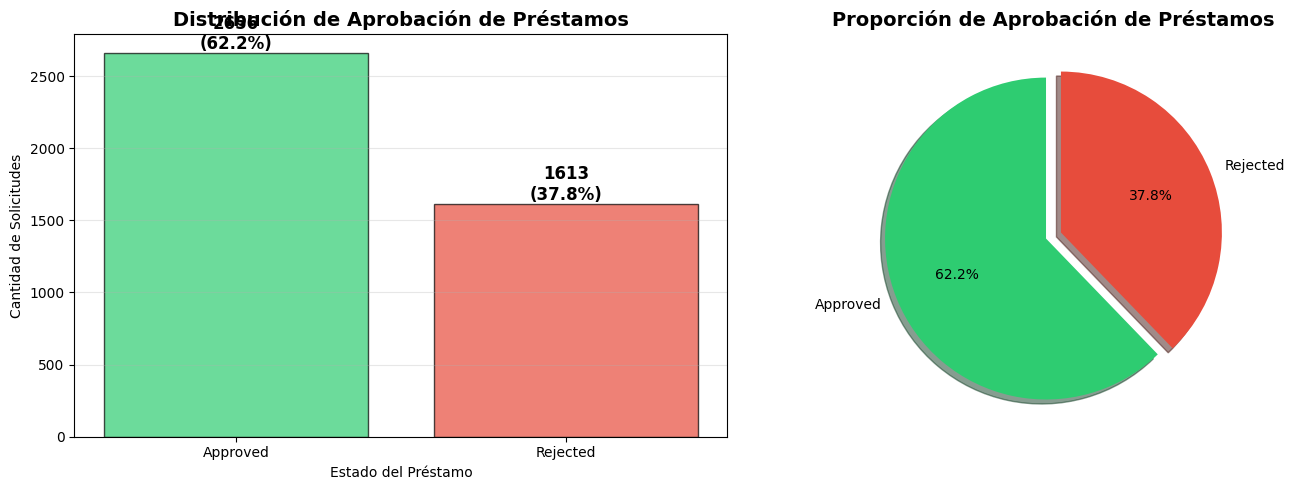

In [148]:
# Crear figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
colors = ['#2ecc71', '#e74c3c']  # Verde para Approved, Rojo para Rejected
bars = axes[0].bar(target_counts.index, target_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución de Aprobación de Préstamos', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Estado del Préstamo')
axes[0].set_ylabel('Cantidad de Solicitudes')
axes[0].grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({height/len(df)*100:.1f}%)',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Gráfico de pastel
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
           colors=colors, startangle=90, explode=[0.05, 0.05], shadow=True)
axes[1].set_title('Proporción de Aprobación de Préstamos', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### 1.4.3. Relación de Variables Numéricas con la Variable Objetivo

Analizaremos cómo las variables numéricas difieren entre préstamos aprobados y rechazados usando boxplots comparativos. Esto nos ayudará a identificar qué características son más discriminativas para la clasificación.

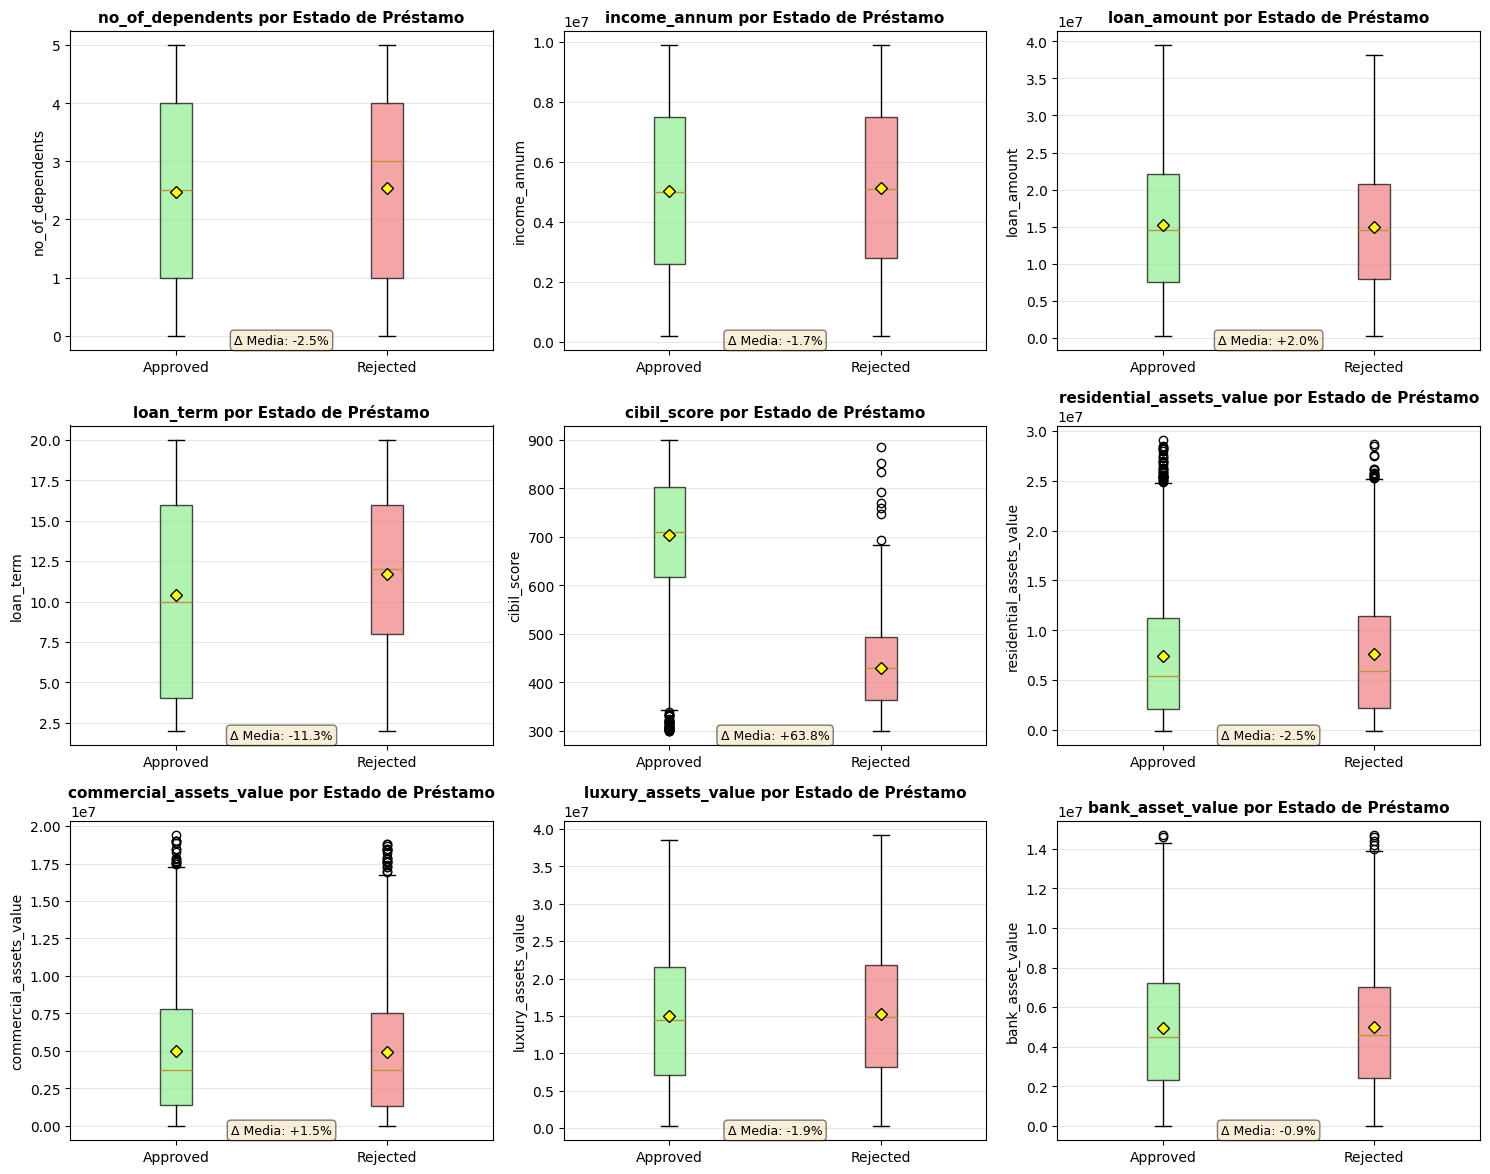

In [149]:
# Configuración de la visualización
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Crear boxplot comparativo para cada variable numérica
for idx, col in enumerate(numerical_cols):
    # Preparar datos por categoría
    data_approved = df[df['loan_status'] == 'Approved'][col]
    data_rejected = df[df['loan_status'] == 'Rejected'][col]
    
    # Crear boxplot
    bp = axes[idx].boxplot([data_approved, data_rejected],
                           labels=['Approved', 'Rejected'],
                           patch_artist=True,
                           showmeans=True,
                           meanprops=dict(marker='D', markerfacecolor='yellow', markeredgecolor='black'))
    
    # Colorear las cajas
    colors = ['lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[idx].set_title(f'{col} por Estado de Préstamo', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Calcular y mostrar medias
    mean_approved = data_approved.mean()
    mean_rejected = data_rejected.mean()
    diff_pct = ((mean_approved - mean_rejected) / mean_rejected * 100) if mean_rejected != 0 else 0
    
    axes[idx].text(0.5, 0.02, f'Δ Media: {diff_pct:+.1f}%',
                   transform=axes[idx].transAxes, ha='center',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), fontsize=9)

# Ocultar ejes no utilizados
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

#### 1.4.4. Relación de Variables Categóricas con la Variable Objetivo

Analizaremos la tasa de aprobación según las variables categóricas para identificar patrones que ayuden a la clasificación.

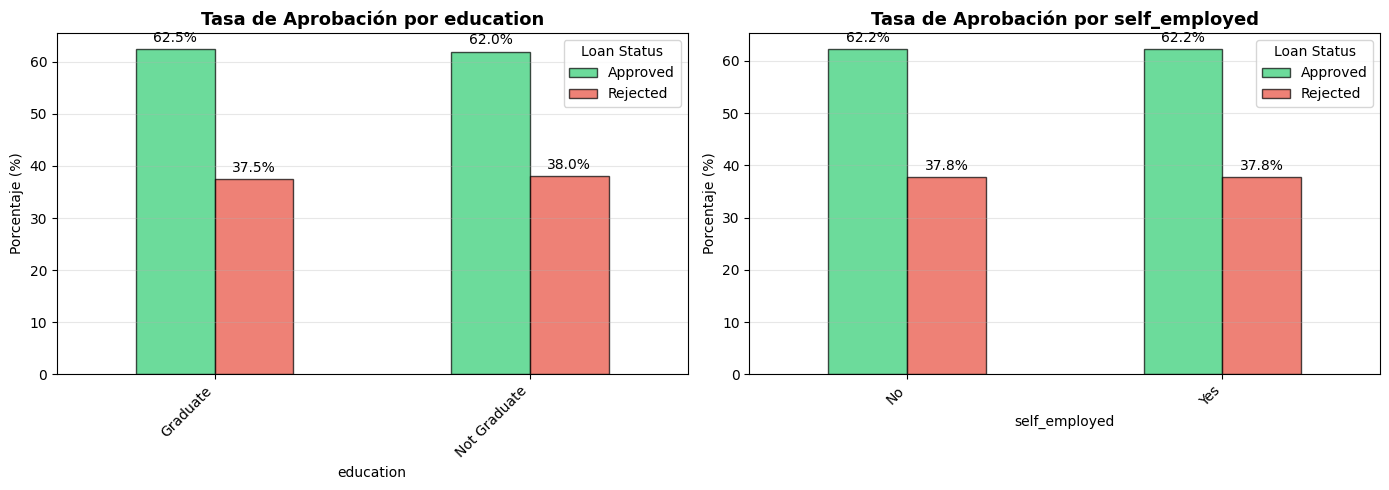


Tablas de Contingencia (Porcentajes por fila):


EDUCATION:
--------------------------------------------------
loan_status   Approved  Rejected
education                       
Graduate         62.45     37.55
Not Graduate     61.98     38.02


SELF_EMPLOYED:
--------------------------------------------------
loan_status    Approved  Rejected
self_employed                    
No                62.20     37.80
Yes               62.23     37.77



In [150]:
# Seleccionar variables categóricas (excluyendo loan_status)
cat_cols_for_analysis = [col for col in categorical_cols if col != 'loan_status']

# Configuración de la visualización
n_cat = len(cat_cols_for_analysis)
fig, axes = plt.subplots(1, n_cat, figsize=(7 * n_cat, 5))
if n_cat == 1:
    axes = [axes]

# Analizar cada variable categórica
for idx, col in enumerate(cat_cols_for_analysis):
    # Limpiar espacios en blanco
    df[col] = df[col].str.strip()
    
    # Crear tabla cruzada
    ct = pd.crosstab(df[col], df['loan_status'], normalize='index') * 100
    
    # Crear gráfico de barras agrupadas
    ct.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
    
    axes[idx].set_title(f'Tasa de Aprobación por {col}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Porcentaje (%)')
    axes[idx].legend(title='Loan Status', loc='upper right')
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    
    # Añadir valores en las barras
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

# Mostrar tabla de contingencia
print("\nTablas de Contingencia (Porcentajes por fila):\n")
for col in cat_cols_for_analysis:
    print(f"\n{col.upper()}:")
    print("-" * 50)
    ct = pd.crosstab(df[col], df['loan_status'], normalize='index') * 100
    print(ct.round(2))
    print()

#### 1.4.5. Matriz de Correlación

Calcularemos la correlación entre variables numéricas para identificar:
- Multicolinealidad (variables altamente correlacionadas entre sí)
- Relaciones lineales entre características

**Nota:** Para clasificación, no podemos correlacionar directamente con loan_status (es categórica), pero identificar multicolinealidad nos ayuda a entender redundancia entre predictores.

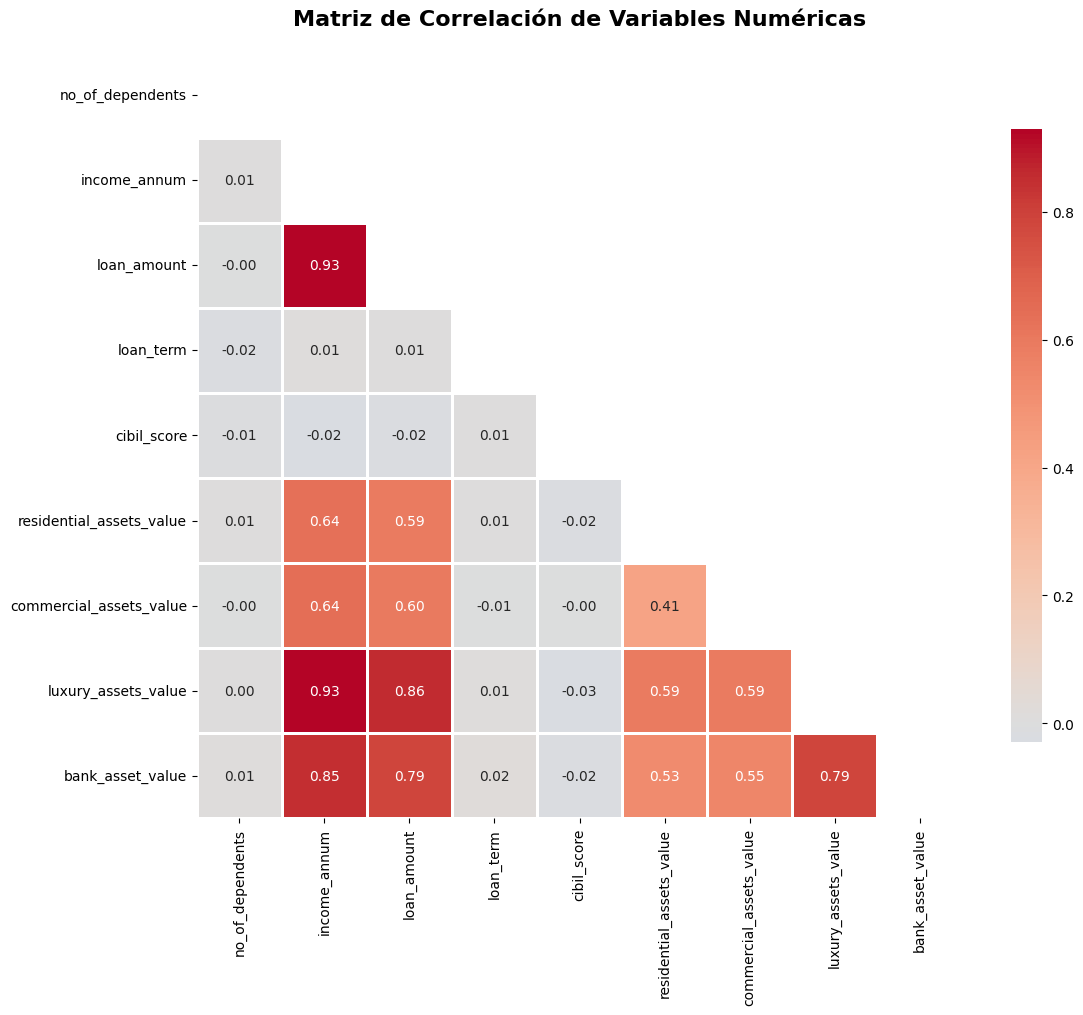


Correlaciones Fuertes (|r| > 0.7):

income_annum                   <-> loan_amount                   :  0.927
income_annum                   <-> luxury_assets_value           :  0.929
income_annum                   <-> bank_asset_value              :  0.851
loan_amount                    <-> luxury_assets_value           :  0.861
loan_amount                    <-> bank_asset_value              :  0.788
luxury_assets_value            <-> bank_asset_value              :  0.789


In [151]:
# Crear una copia del dataframe para análisis de correlación
df_corr = df[numerical_cols].copy()

# Calcular matriz de correlación
correlation_matrix = df_corr.corr()

# Crear visualización
plt.figure(figsize=(12, 10))

# Heatmap de correlación
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara triangular
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})

plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes
print("\nCorrelaciones Fuertes (|r| > 0.7):\n")
print("="*70)

threshold = 0.7
correlations_found = False
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            print(f"{correlation_matrix.columns[i]:30s} <-> {correlation_matrix.columns[j]:30s}: {correlation_matrix.iloc[i, j]:6.3f}")
            correlations_found = True

if not correlations_found:
    print("No se encontraron correlaciones fuertes (|r| > 0.7) entre variables")

## 2. PREPROCESAMIENTO DE DATOS

El preprocesamiento es una fase crítica que prepara los datos para el entrenamiento de la red neuronal. En esta sección realizaremos:

1. **Limpieza de datos**: Eliminar inconsistencias, duplicados y valores anómalos
2. **Codificación de variables**: Convertir variables categóricas a formato numérico
3. **Normalización**: Escalar las características numéricas a un rango común
4. **Balanceo de clases**: Ajustar la distribución de la variable objetivo si es necesario
5. **División del dataset**: Separar datos en conjuntos de entrenamiento, validación y prueba

Estos pasos son esenciales para que la red neuronal pueda aprender eficientemente y generalizar bien a nuevos datos.

### 2.1. Limpieza de Datos

Realizaremos una limpieza exhaustiva del dataset para eliminar inconsistencias y preparar los datos para el modelado.

#### 2.1.1. Limpieza de Espacios en Blanco

Eliminaremos espacios adicionales en variables de texto que puedan causar problemas en el procesamiento.

In [152]:
# Crear una copia del dataframe para preprocesamiento
df_clean = df.copy()

# Limpiar espacios en todas las columnas de tipo object
for col in df_clean.select_dtypes(include=['object']).columns:
    # Contar valores antes de limpiar
    before = df_clean[col].apply(lambda x: x != x.strip() if isinstance(x, str) else False).sum()
    
    # Limpiar espacios
    df_clean[col] = df_clean[col].str.strip()

#### 2.1.2. Detección y Eliminación de Duplicados

Verificaremos si existen registros duplicados que puedan sesgar el entrenamiento del modelo.

In [153]:
print("DETECCIÓN DE REGISTROS DUPLICADOS\n")
print("="*70)

# Verificar duplicados (excluyendo loan_id que es único)
cols_to_check = [col for col in df_clean.columns if col != 'loan_id']
duplicates = df_clean.duplicated(subset=cols_to_check, keep='first')

print(f"Registros duplicados encontrados: {duplicates.sum()}")

if duplicates.sum() > 0:
    print(f"Porcentaje de duplicados: {duplicates.sum() / len(df_clean) * 100:.2f}%")
    
    # Eliminar duplicados
    df_clean = df_clean[~duplicates].reset_index(drop=True)
    
    print(f"\n✓ {duplicates.sum()} registros duplicados eliminados")
    print(f"Registros restantes: {len(df_clean)}")
else:
    print("No se encontraron registros duplicados")

print(f"\nDimensiones del dataset después de limpieza: {df_clean.shape}")

DETECCIÓN DE REGISTROS DUPLICADOS

Registros duplicados encontrados: 0
No se encontraron registros duplicados

Dimensiones del dataset después de limpieza: (4269, 13)


#### 2.1.3. Tratamiento de Outliers

Analizaremos outliers extremos que podrían afectar el entrenamiento. Para problemas de clasificación, no siempre es necesario eliminar outliers ya que pueden representar casos legítimos (ej: préstamos grandes).

Implementaremos un enfoque conservador: solo marcaremos outliers extremos (más allá de 3 desviaciones estándar) y decidiremos caso por caso.

In [154]:
print("ANÁLISIS DE OUTLIERS EXTREMOS\n")
print("="*70)

# Función para detectar outliers usando Z-score
def detect_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    z_scores = np.abs((df[column] - mean) / std)
    return z_scores > threshold

# Analizar cada variable numérica
outlier_summary = {}
for col in numerical_cols:
    outliers_mask = detect_outliers_zscore(df_clean, col, threshold=3)
    outlier_count = outliers_mask.sum()
    outlier_pct = (outlier_count / len(df_clean)) * 100
    outlier_summary[col] = {'count': outlier_count, 'pct': outlier_pct}
    
    print(f"{col:30s}: {outlier_count:4d} outliers extremos ({outlier_pct:5.2f}%)")

# Resumen
total_outliers = sum(item['count'] for item in outlier_summary.values())
print(f"\n{'TOTAL':30s}: {total_outliers:4d} outliers extremos detectados")


ANÁLISIS DE OUTLIERS EXTREMOS

no_of_dependents              :    0 outliers extremos ( 0.00%)
income_annum                  :    0 outliers extremos ( 0.00%)
loan_amount                   :    0 outliers extremos ( 0.00%)
loan_term                     :    0 outliers extremos ( 0.00%)
cibil_score                   :    0 outliers extremos ( 0.00%)
residential_assets_value      :   16 outliers extremos ( 0.37%)
commercial_assets_value       :   17 outliers extremos ( 0.40%)
luxury_assets_value           :    0 outliers extremos ( 0.00%)
bank_asset_value              :    0 outliers extremos ( 0.00%)

TOTAL                         :   33 outliers extremos detectados


### 2.2. Codificación de Variables

Convertiremos las variables categóricas a formato numérico, que es el formato requerido por las redes neuronales.

**Estrategia de codificación:**
- **Variable objetivo (loan_status)**: Label Encoding → Approved=1, Rejected=0
- **Variables categóricas (education, self_employed)**: One-Hot Encoding → Creación de variables dummy

#### 2.2.1. Codificación de la Variable Objetivo

Convertiremos la variable objetivo loan_status a formato binario numérico.

In [159]:
from sklearn.preprocessing import LabelEncoder

print("CODIFICACIÓN DE LA VARIABLE OBJETIVO\n")
print("="*70)

# Mostrar valores originales
print("Valores originales de loan_status:")
print(df_clean['loan_status'].value_counts())

# Crear codificador
le = LabelEncoder()

# Codificar variable objetivo
df_clean['loan_status_encoded'] = le.fit_transform(df_clean['loan_status'])

# Mostrar mapeo
print("\nMapeo de codificación:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
    print(f"  {original:12s} → {encoded}")

# Verificar distribución
print("\nDistribución después de codificación:")
print(df_clean['loan_status_encoded'].value_counts().sort_index())

print("\nVariable objetivo codificada exitosamente")

CODIFICACIÓN DE LA VARIABLE OBJETIVO

Valores originales de loan_status:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Mapeo de codificación:
  Approved     → 0
  Rejected     → 1

Distribución después de codificación:
loan_status_encoded
0    2656
1    1613
Name: count, dtype: int64

Variable objetivo codificada exitosamente


#### 2.2.2. Codificación de Variables Categóricas (One-Hot Encoding)

Convertiremos las variables categóricas (education, self_employed) usando One-Hot Encoding, que crea variables binarias para cada categoría.

**Ejemplo:**
- education: "Graduate" → education_Graduate=1, education_Not Graduate=0
- self_employed: "Yes" → self_employed_Yes=1, self_employed_No=0

In [ ]:
print("CODIFICACIÓN ONE-HOT DE VARIABLES CATEGÓRICAS\n")
print("="*70)

# Identificar variables categóricas a codificar (excluyendo loan_status)
cat_cols_to_encode = [col for col in categorical_cols if col != 'loan_status']

print(f"Variables a codificar: {cat_cols_to_encode}\n")

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_clean, columns=cat_cols_to_encode, prefix=cat_cols_to_encode, drop_first=False)

# Mostrar nuevas columnas creadas
print("Columnas creadas después de One-Hot Encoding:")
for col in cat_cols_to_encode:
    new_cols = [c for c in df_encoded.columns if c.startswith(col + '_')]
    print(f"\n{col}:")
    for new_col in new_cols:
        count = df_encoded[new_col].sum()
        print(f"  - {new_col:40s}: {count:5.0f} registros con valor 1")

print(f"\nDimensiones después de codificación: {df_encoded.shape}")
print(f"  - Variables originales: {df_clean.shape[1]}")
print(f"  - Variables después de One-Hot: {df_encoded.shape[1]}")
print(f"  - Nuevas variables creadas: {df_encoded.shape[1] - df_clean.shape[1]}")

print("\nVariables categóricas codificadas exitosamente")

CODIFICACIÓN ONE-HOT DE VARIABLES CATEGÓRICAS

Variables a codificar: ['education', 'self_employed']

Columnas creadas después de One-Hot Encoding:

education:
  - education_Graduate                      :  2144 registros con valor 1
  - education_Not Graduate                  :  2125 registros con valor 1

self_employed:
  - self_employed_No                        :  2119 registros con valor 1
  - self_employed_Yes                       :  2150 registros con valor 1

Dimensiones después de codificación: (4269, 16)
  - Variables originales: 14
  - Variables después de One-Hot: 16
  - Nuevas variables creadas: 2

✓ Variables categóricas codificadas exitosamente


### 2.3. Normalización de Características Numéricas

La normalización es crucial para redes neuronales porque:
1. Las variables tienen escalas muy diferentes (ej: cibil_score vs income_annum)
2. Escalas grandes pueden dominar el aprendizaje
3. La normalización acelera la convergencia del entrenamiento

Utilizaremos **StandardScaler** que transforma los datos para tener media=0 y desviación estándar=1.

**Importante:** Solo normalizaremos las variables numéricas originales, NO las variables One-Hot (ya están en escala 0-1).

#### 2.3.1. Preparación de Variables para Normalización

Identificaremos qué variables necesitan ser normalizadas.

In [156]:
print("PREPARACIÓN PARA NORMALIZACIÓN\n")
print("="*70)

# Variables numéricas originales a normalizar
vars_to_normalize = numerical_cols.copy()

# Primero necesitamos identificar qué columnas One-Hot se crearán
# (aún no existen porque no hemos codificado)
cat_cols_to_encode = [col for col in categorical_cols if col != 'loan_status']

print("Variables que SERÁN normalizadas:")
print(f"  Total: {len(vars_to_normalize)}")
for var in vars_to_normalize:
    print(f"  - {var}")

print(f"\nVariables que NO serán normalizadas:")
print(f"  - loan_id (identificador)")
print(f"  - loan_status y loan_status_encoded (variable objetivo)")
print(f"  - Variables One-Hot que se crearán después de codificar: {cat_cols_to_encode}")
print(f"    (Estas variables One-Hot ya estarán en escala 0-1)")


PREPARACIÓN PARA NORMALIZACIÓN

Variables que SERÁN normalizadas:
  Total: 9
  - no_of_dependents
  - income_annum
  - loan_amount
  - loan_term
  - cibil_score
  - residential_assets_value
  - commercial_assets_value
  - luxury_assets_value
  - bank_asset_value

Variables que NO serán normalizadas:
  - loan_id (identificador)
  - loan_status y loan_status_encoded (variable objetivo)
  - Variables One-Hot que se crearán después de codificar: ['education', 'self_employed']
    (Estas variables One-Hot ya estarán en escala 0-1)


#### 2.3.2. Aplicación de StandardScaler

Aplicaremos StandardScaler a las variables numéricas. Esta transformación convierte cada variable a: **z = (x - μ) / σ**

Donde:
- x = valor original
- μ = media de la variable
- σ = desviación estándar
- z = valor normalizado

In [163]:
from sklearn.preprocessing import StandardScaler

print("APLICACIÓN DE STANDARDSCALER\n")
print("="*70)

# Crear copia del dataframe para normalización
df_normalized = df_encoded.copy()

# Inicializar StandardScaler
scaler = StandardScaler()

# Mostrar estadísticas ANTES de normalizar
print("Estadísticas ANTES de normalización (primeras 3 variables):\n")
for col in vars_to_normalize[:3]:
    print(f"{col}:")
    print(f"  Media: {df_normalized[col].mean():,.2f}")
    print(f"  Std:   {df_normalized[col].std():,.2f}")
    print(f"  Min:   {df_normalized[col].min():,.2f}")
    print(f"  Max:   {df_normalized[col].max():,.2f}")
    print()

# Aplicar normalización
df_normalized[vars_to_normalize] = scaler.fit_transform(df_normalized[vars_to_normalize])

# Mostrar estadísticas DESPUÉS de normalizar
print("="*70)
print("\nEstadísticas DESPUÉS de normalización (primeras 3 variables):\n")
for col in vars_to_normalize[:3]:
    print(f"{col}:")
    print(f"  Media: {df_normalized[col].mean():.2f}")
    print(f"  Std:   {df_normalized[col].std():.2f}")
    print(f"  Min:   {df_normalized[col].min():.2f}")
    print(f"  Max:   {df_normalized[col].max():.2f}")
    print()

print("="*70)
print("✓ Normalización completada exitosamente")
print(f"✓ {len(vars_to_normalize)} variables normalizadas")
print("✓ Media ≈ 0 y Desviación estándar ≈ 1 para todas las variables normalizadas")

APLICACIÓN DE STANDARDSCALER

Estadísticas ANTES de normalización (primeras 3 variables):

no_of_dependents:
  Media: 2.50
  Std:   1.70
  Min:   0.00
  Max:   5.00

income_annum:
  Media: 5,059,123.92
  Std:   2,806,839.83
  Min:   200,000.00
  Max:   9,900,000.00

loan_amount:
  Media: 15,133,450.46
  Std:   9,043,362.98
  Min:   300,000.00
  Max:   39,500,000.00


Estadísticas DESPUÉS de normalización (primeras 3 variables):

no_of_dependents:
  Media: 0.00
  Std:   1.00
  Min:   -1.47
  Max:   1.48

income_annum:
  Media: 0.00
  Std:   1.00
  Min:   -1.73
  Max:   1.72

loan_amount:
  Media: 0.00
  Std:   1.00
  Min:   -1.64
  Max:   2.69

✓ Normalización completada exitosamente
✓ 9 variables normalizadas
✓ Media ≈ 0 y Desviación estándar ≈ 1 para todas las variables normalizadas


#### 2.3.3. Visualización del Efecto de la Normalización

Compararemos las distribuciones antes y después de la normalización para algunas variables clave.

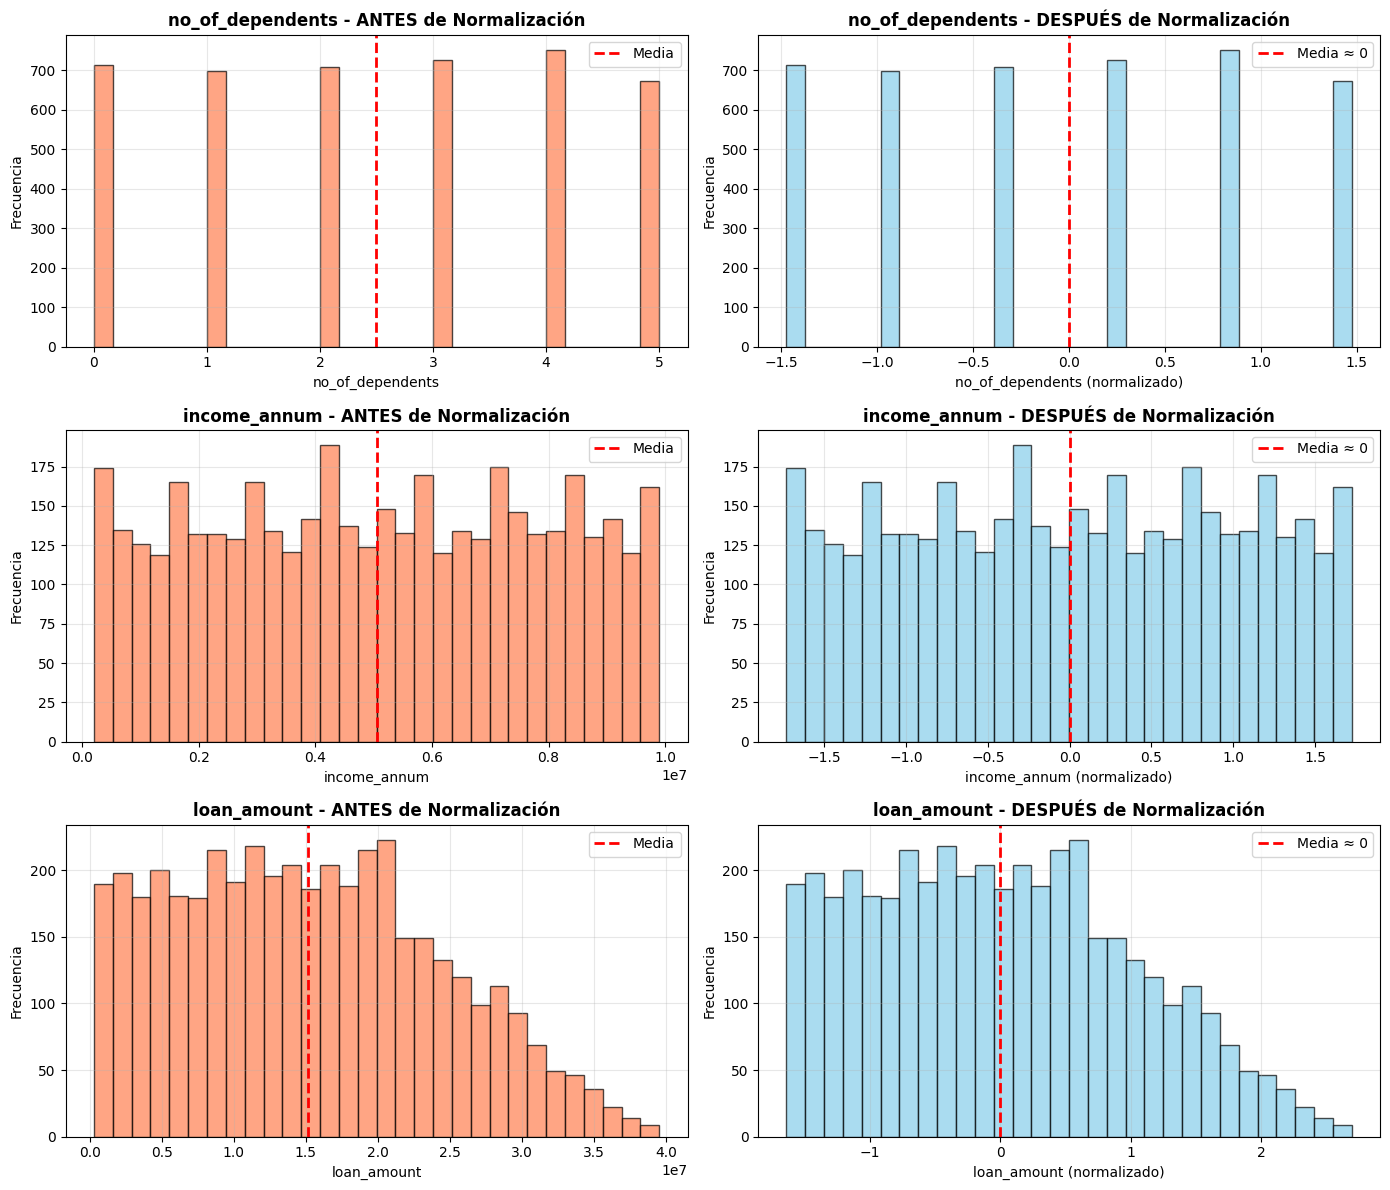

In [165]:
# Seleccionar 3 variables para visualizar el efecto
vars_to_plot = vars_to_normalize[:3]

fig, axes = plt.subplots(len(vars_to_plot), 2, figsize=(14, len(vars_to_plot) * 4))

for idx, col in enumerate(vars_to_plot):
    # Antes de normalizar (del df_encoded)
    axes[idx, 0].hist(df_encoded[col], bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'{col} - ANTES de Normalización', fontweight='bold')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frecuencia')
    axes[idx, 0].grid(True, alpha=0.3)
    axes[idx, 0].axvline(df_encoded[col].mean(), color='red', linestyle='--', linewidth=2, label='Media')
    axes[idx, 0].legend()
    
    # Después de normalizar (del df_normalized)
    axes[idx, 1].hist(df_normalized[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx, 1].set_title(f'{col} - DESPUÉS de Normalización', fontweight='bold')
    axes[idx, 1].set_xlabel(f'{col} (normalizado)')
    axes[idx, 1].set_ylabel('Frecuencia')
    axes[idx, 1].grid(True, alpha=0.3)
    axes[idx, 1].axvline(df_normalized[col].mean(), color='red', linestyle='--', linewidth=2, label='Media ≈ 0')
    axes[idx, 1].legend()

plt.tight_layout()
plt.show()

### 2.4. Balanceo de Clases

Evaluaremos si es necesario aplicar técnicas de balanceo de clases para mejorar el rendimiento del modelo en la clase minoritaria.

#### 2.4.1. Análisis del Desbalance Actual

Verificaremos el nivel de desbalance en el dataset después del preprocesamiento.

In [171]:
print("ANÁLISIS DE BALANCEO DE CLASES\n")
print("="*70)

# Analizar distribución de clases
class_distribution = df_normalized['loan_status_encoded'].value_counts().sort_index()
class_percentage = df_normalized['loan_status_encoded'].value_counts(normalize=True).sort_index() * 100

print("Distribución actual de clases:")
print(f"\nClase 0: {class_distribution[0]:,} ({class_percentage[0]:.2f}%)")
print(f"Clase 1: {class_distribution[1]:,} ({class_percentage[1]:.2f}%)")

# Calcular ratio
ratio = max(class_distribution) / min(class_distribution)
print(f"\nRatio de desbalance: {ratio:.2f}:1")

# Evaluar necesidad de balanceo
print("\n" + "="*70)
print("EVALUACIÓN:")
if ratio <= 1.5:
    print("✓ Clases relativamente balanceadas (ratio ≤ 1.5:1)")
    print("✓ NO se requiere balanceo de clases")
    print("✓ El modelo puede entrenarse directamente con los datos actuales")
    apply_balancing = False
    balancing_method = "ninguno"
elif ratio <= 3.0:
    print("⚠️  Desbalance moderado (1.5:1 < ratio ≤ 3.0)")
    print("📌 ESTRATEGIA ELEGIDA: class_weight='balanced'")
    print("\n   ✓ Usaremos pesos de clase en el modelo")
    print("   ✓ NO modificaremos el dataset (sin SMOTE)")
    print("   ✓ El modelo dará más importancia a la clase minoritaria durante el entrenamiento")
    apply_balancing = False  # No SMOTE
    balancing_method = "class_weight"
else:
    print("⚠️  Desbalance severo (ratio > 3.0)")
    print("📌 ESTRATEGIA: Se recomienda SMOTE, pero probaremos primero con class_weight")
    apply_balancing = False
    balancing_method = "class_weight"

print("\n" + "="*70)

ANÁLISIS DE BALANCEO DE CLASES

Distribución actual de clases:

Clase 0: 2,656 (62.22%)
Clase 1: 1,613 (37.78%)

Ratio de desbalance: 1.65:1

EVALUACIÓN:
⚠️  Desbalance moderado (1.5:1 < ratio ≤ 3.0)
📌 ESTRATEGIA ELEGIDA: class_weight='balanced'

   ✓ Usaremos pesos de clase en el modelo
   ✓ NO modificaremos el dataset (sin SMOTE)
   ✓ El modelo dará más importancia a la clase minoritaria durante el entrenamiento



#### 2.4.2. Estrategia de Balanceo: class_weight='balanced'

Explicaremos cómo funciona la estrategia de balanceo mediante pesos de clase y cómo se aplicará en el modelo.

In [172]:
print("ESTRATEGIA DE BALANCEO\n")
print("="*70)

if balancing_method == "class_weight":
    print("✓ Estrategia elegida: class_weight='balanced'\n")
    print("¿Qué significa esto?")
    print("  - NO modificaremos el dataset (no creamos datos sintéticos)")
    print("  - Durante el entrenamiento, el modelo dará MÁS peso a la clase minoritaria")
    print("  - Keras ajustará automáticamente la función de pérdida")
    print("\nCálculo de pesos:")
    print(f"  - Clase 0: {class_distribution[0]:,} ejemplos")
    print(f"  - Clase 1: {class_distribution[1]:,} ejemplos")
    
    # Calcular pesos que usará el modelo
    total = len(df_normalized)
    weight_0 = total / (2 * class_distribution[0])
    weight_1 = total / (2 * class_distribution[1])
    
    print(f"\nPesos que aplicará el modelo:")
    print(f"  - Clase 0: {weight_0:.3f}")
    print(f"  - Clase 1: {weight_1:.3f}")
    print(f"\n  → La clase minoritaria tendrá {weight_1/weight_0:.2f}x más peso en el entrenamiento")
    
    print("\nVentajas de class_weight:")
    print("  ✓ Más simple que SMOTE (no crea datos sintéticos)")
    print("  ✓ Mantiene el dataset original")
    print("  ✓ Efectivo para desbalances moderados")
    print("  ✓ Menos propenso a overfitting que SMOTE")
    print("  ✓ Se aplica directamente en model.fit() con un parámetro")
    
    print("\n¿Cómo se implementará?")
    print("  En la Sección 3, al entrenar el modelo:")
    print("  ```python")
    print("  from sklearn.utils import class_weight")
    print("  ")
    print("  class_weights = class_weight.compute_class_weight(")
    print("      'balanced',")
    print("      classes=np.unique(y_train),")
    print("      y=y_train")
    print("  )")
    print("  ")
    print("  history = model.fit(")
    print("      X_train, y_train,")
    print("      class_weight={0: class_weights[0], 1: class_weights[1]}")
    print("  )")
    print("  ```")
    
elif balancing_method == "ninguno":
    print("✓ No se requiere balanceo")
    print("✓ Las clases están suficientemente balanceadas")
    print("✓ El modelo se entrenará sin ajustes adicionales")

print("\n" + "="*70)
print("✓ Estrategia de balanceo definida")
print("✓ Procederemos a dividir los datos")

ESTRATEGIA DE BALANCEO

✓ Estrategia elegida: class_weight='balanced'

¿Qué significa esto?
  - NO modificaremos el dataset (no creamos datos sintéticos)
  - Durante el entrenamiento, el modelo dará MÁS peso a la clase minoritaria
  - Keras ajustará automáticamente la función de pérdida

Cálculo de pesos:
  - Clase 0: 2,656 ejemplos
  - Clase 1: 1,613 ejemplos

Pesos que aplicará el modelo:
  - Clase 0: 0.804
  - Clase 1: 1.323

  → La clase minoritaria tendrá 1.65x más peso en el entrenamiento

Ventajas de class_weight:
  ✓ Más simple que SMOTE (no crea datos sintéticos)
  ✓ Mantiene el dataset original
  ✓ Efectivo para desbalances moderados
  ✓ Menos propenso a overfitting que SMOTE
  ✓ Se aplica directamente en model.fit() con un parámetro

¿Cómo se implementará?
  En la Sección 3, al entrenar el modelo:
  ```python
  from sklearn.utils import class_weight
  
  class_weights = class_weight.compute_class_weight(
      'balanced',
      classes=np.unique(y_train),
      y=y_train
  )

### 2.5. División del Conjunto de Datos

Dividiremos el dataset en tres conjuntos:
- **Entrenamiento (70%)**: Para entrenar la red neuronal
- **Validación (15%)**: Para ajustar hiperparámetros y prevenir overfitting
- **Prueba (15%)**: Para evaluación final del modelo

Esta división es crítica para evaluar correctamente la capacidad de generalización del modelo.s

### 2.5. División del Conjunto de Datos

Dividiremos el dataset en tres conjuntos:
- **Entrenamiento (70%)**: Para entrenar la red neuronal
- **Validación (15%)**: Para ajustar hiperparámetros y prevenir overfitting
- **Prueba (15%)**: Para evaluación final del modelo

Esta división es crítica para evaluar correctamente la capacidad de generalización del modelo.

#### 2.5.1. Preparación de Características (X) y Variable Objetivo (y)

Separaremos las variables predictoras (features) de la variable objetivo (target).

In [173]:
print("PREPARACIÓN DE X (Features) y y (Target)\n")
print("="*70)

# Preparar X: todas las variables excepto las relacionadas con loan_status y loan_id
cols_to_exclude = ['loan_id', 'loan_status', 'loan_status_encoded']
X = df_normalized.drop(columns=cols_to_exclude)

# Preparar y: variable objetivo codificada
y = df_normalized['loan_status_encoded']

print(f"Dimensiones de X (Features): {X.shape}")
print(f"  - Número de registros: {X.shape[0]:,}")
print(f"  - Número de características: {X.shape[1]}")

print(f"\nDimensiones de y (Target): {y.shape}")
print(f"  - Número de registros: {y.shape[0]:,}")

print("\n" + "-"*70)
print("\nVariables incluidas en X:")
for idx, col in enumerate(X.columns, 1):
    print(f"  {idx:2d}. {col}")

print("\n" + "="*70)
print("✓ Features (X) y Target (y) preparados correctamente")

PREPARACIÓN DE X (Features) y y (Target)

Dimensiones de X (Features): (4269, 13)
  - Número de registros: 4,269
  - Número de características: 13

Dimensiones de y (Target): (4269,)
  - Número de registros: 4,269

----------------------------------------------------------------------

Variables incluidas en X:
   1. no_of_dependents
   2. income_annum
   3. loan_amount
   4. loan_term
   5. cibil_score
   6. residential_assets_value
   7. commercial_assets_value
   8. luxury_assets_value
   9. bank_asset_value
  10. education_Graduate
  11. education_Not Graduate
  12. self_employed_No
  13. self_employed_Yes

✓ Features (X) y Target (y) preparados correctamente


#### 2.5.2. División Inicial: Train+Validation (85%) y Test (15%)

Primero separaremos el conjunto de prueba (test) que NO se tocará hasta la evaluación final.

In [174]:
from sklearn.model_selection import train_test_split

print("DIVISIÓN INICIAL: Train+Validation vs Test\n")
print("="*70)

# Primera división: 85% para train+val, 15% para test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.15,  # 15% para test
    random_state=42,  # Semilla para reproducibilidad
    stratify=y  # Mantener la proporción de clases
)

print(f"Dataset original: {len(X):,} registros\n")

print(f"Train + Validation: {len(X_temp):,} registros ({len(X_temp)/len(X)*100:.1f}%)")
print(f"Test:               {len(X_test):,} registros ({len(X_test)/len(X)*100:.1f}%)")

# Verificar distribución de clases en test
print("\nDistribución de clases en Test:")
test_dist = y_test.value_counts().sort_index()
for cls, count in test_dist.items():
    pct = count / len(y_test) * 100
    print(f"  Clase {cls}: {count:,} ({pct:.1f}%)")

print("\n✓ Conjunto de Test separado correctamente")
print("✓ La proporción de clases se mantiene gracias a stratify=y")

DIVISIÓN INICIAL: Train+Validation vs Test

Dataset original: 4,269 registros

Train + Validation: 3,628 registros (85.0%)
Test:               641 registros (15.0%)

Distribución de clases en Test:
  Clase 0: 399 (62.2%)
  Clase 1: 242 (37.8%)

✓ Conjunto de Test separado correctamente
✓ La proporción de clases se mantiene gracias a stratify=y


#### 2.5.3. División Final: Train (70%) y Validation (15%)

Ahora dividiremos el conjunto temporal (85%) en Train y Validation.

In [175]:
print("DIVISIÓN FINAL: Train vs Validation\n")
print("="*70)

# Segunda división: del 85% temporal, 70% será train y 15% será validation
# Cálculo: 0.15/0.85 ≈ 0.176 para obtener 15% del total original
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.176,  # ~15% del total original
    random_state=42,
    stratify=y_temp
)

# Resumen final de la división
print("RESUMEN FINAL DE LA DIVISIÓN:\n")
print(f"{'Conjunto':15s} | {'Registros':>10s} | {'Porcentaje':>12s} | {'Features':>10s}")
print("-" * 60)
print(f"{'Train':15s} | {len(X_train):>10,} | {len(X_train)/len(X)*100:>11.1f}% | {X_train.shape[1]:>10d}")
print(f"{'Validation':15s} | {len(X_val):>10,} | {len(X_val)/len(X)*100:>11.1f}% | {X_val.shape[1]:>10d}")
print(f"{'Test':15s} | {len(X_test):>10,} | {len(X_test)/len(X)*100:>11.1f}% | {X_test.shape[1]:>10d}")
print("-" * 60)
print(f"{'TOTAL':15s} | {len(X):>10,} | {100.0:>11.1f}% | {X.shape[1]:>10d}")

# Mostrar distribución de clases en cada conjunto
print("\n" + "="*70)
print("\nDISTRIBUCIÓN DE CLASES POR CONJUNTO:\n")

for name, y_set in [('Train', y_train), ('Validation', y_val), ('Test', y_test)]:
    dist = y_set.value_counts().sort_index()
    print(f"{name}:")
    for cls, count in dist.items():
        pct = count / len(y_set) * 100
        print(f"  Clase {cls}: {count:>5,} ({pct:>5.1f}%)")
    print()

print("="*70)
print("✓ División completada exitosamente")
print("✓ Las proporciones están correctas: ~70% Train, ~15% Validation, ~15% Test")
print("✓ La distribución de clases se mantiene en todos los conjuntos")

DIVISIÓN FINAL: Train vs Validation

RESUMEN FINAL DE LA DIVISIÓN:

Conjunto        |  Registros |   Porcentaje |   Features
------------------------------------------------------------
Train           |      2,989 |        70.0% |         13
Validation      |        639 |        15.0% |         13
Test            |        641 |        15.0% |         13
------------------------------------------------------------
TOTAL           |      4,269 |       100.0% |         13


DISTRIBUCIÓN DE CLASES POR CONJUNTO:

Train:
  Clase 0: 1,859 ( 62.2%)
  Clase 1: 1,130 ( 37.8%)

Validation:
  Clase 0:   398 ( 62.3%)
  Clase 1:   241 ( 37.7%)

Test:
  Clase 0:   399 ( 62.2%)
  Clase 1:   242 ( 37.8%)

✓ División completada exitosamente
✓ Las proporciones están correctas: ~70% Train, ~15% Validation, ~15% Test
✓ La distribución de clases se mantiene en todos los conjuntos
